In [7]:
# ==============================
# 📘 Week 5: Supervised Learning (Regression)
# Linear Regression on House Price Dataset
# ==============================

# Step 1: Upload CSV File
from google.colab import files
import pandas as pd

uploaded = files.upload()

# Automatically detect the uploaded file name
filename = list(uploaded.keys())[0]
print(f"✅ File uploaded successfully: {filename}")

# Step 2: Load the Dataset
df = pd.read_csv(filename)
print("✅ Dataset Loaded Successfully!")
df.head()


Saving house_price_cleaned .csv to house_price_cleaned  (2).csv
✅ File uploaded successfully: house_price_cleaned  (2).csv
✅ Dataset Loaded Successfully!


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,zipcode
0,1,126958.0,2.0,3.000000,4933,6222,2,0,3,Fair,98103
1,2,676155.0,2.0,3.000000,4277,6315,1,0,1,Poor,98103
2,3,136932.0,4.0,2.021053,3369,5869,1,0,3,Good,98102
3,4,370838.0,4.0,1.000000,3734,1876,1,1,3,Poor,98104
4,5,264178.0,1.0,1.000000,4291,8027,2,0,3,Poor,98104


In [8]:
# Step 3: Basic Info & Summary
print("📊 Dataset Information:")
df.info()

print("\n📈 Summary Statistics:")
print(df.describe())


📊 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           100 non-null    int64  
 1   price        100 non-null    float64
 2   bedrooms     100 non-null    float64
 3   bathrooms    100 non-null    float64
 4   sqft_living  100 non-null    int64  
 5   sqft_lot     100 non-null    int64  
 6   floors       100 non-null    int64  
 7   waterfront   100 non-null    int64  
 8   view         100 non-null    int64  
 9   condition    100 non-null    object 
 10  zipcode      100 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 8.7+ KB

📈 Summary Statistics:
               id          price    bedrooms   bathrooms  sqft_living  \
count  100.000000     100.000000  100.000000  100.000000   100.000000   
mean    50.500000  472350.242105    2.989474    2.021053  2809.060000   
std     29.011492  2750

In [9]:
# Step 4: Select Numeric Columns Automatically
numeric_df = df.select_dtypes(include=['int64', 'float64'])
print("🧮 Numeric columns detected:", numeric_df.columns.tolist())


🧮 Numeric columns detected: ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'zipcode']


In [10]:
# Step 5: Define Features (X) and Target (y)
# Assuming 'SalePrice' is your target variable
# If your dataset has another target column, replace it below

if 'SalePrice' in numeric_df.columns:
    y = numeric_df['SalePrice']
    X = numeric_df.drop(columns=['SalePrice'])
else:
    # If no SalePrice column found, use the last column as target
    y = numeric_df.iloc[:, -1]
    X = numeric_df.iloc[:, :-1]

print("✅ Features and Target Selected")
print("Features shape:", X.shape)
print("Target shape:", y.shape)


✅ Features and Target Selected
Features shape: (100, 9)
Target shape: (100,)


In [11]:
# Step 6: Split Data into Train and Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("📂 Train and Test Split Complete")


📂 Train and Test Split Complete


In [12]:
# Step 7: Train Linear Regression Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
print("✅ Model Training Complete")


✅ Model Training Complete


In [13]:
# Step 8: Make Predictions
y_pred = model.predict(X_test)
print("📈 Predictions Completed")


📈 Predictions Completed


In [14]:
# Step 9: Evaluate Model
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = model.score(X_test, y_test)

print("🔍 Model Evaluation Results:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


🔍 Model Evaluation Results:
Mean Absolute Error (MAE): 1.12
Root Mean Squared Error (RMSE): 1.33
R² Score: -0.4505


In [15]:
# Step 10: Model Details
print("⚙️ Model Coefficients:")
for name, coef in zip(X.columns, model.coef_):
    print(f"{name}: {coef:.4f}")

print("\nIntercept:", model.intercept_)





⚙️ Model Coefficients:
id: 0.0046
price: -0.0000
bedrooms: 0.0632
bathrooms: -0.2580
sqft_living: -0.0001
sqft_lot: 0.0000
floors: -0.0978
waterfront: -0.3812
view: 0.1404

Intercept: 98102.97158309934


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


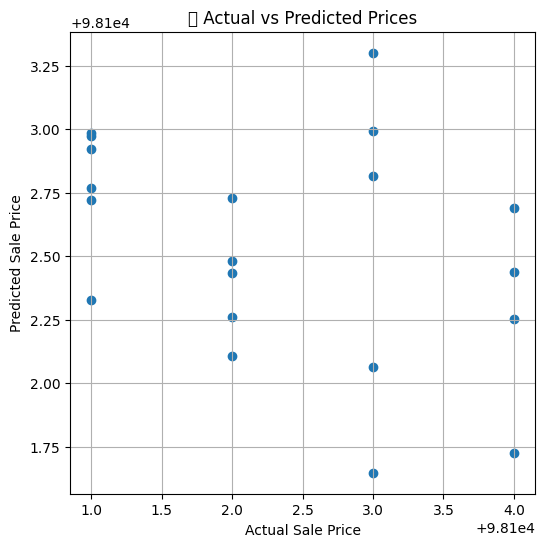

In [16]:
# Step 11: Optional – Visualization (Actual vs Predicted)
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("📊 Actual vs Predicted Prices")
plt.grid(True)
plt.show()
